In [1]:
import uproot
import awkward as ak
import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import numpy as np
import scipy as sp
from mpl_toolkits import mplot3d
from scipy.stats import wasserstein_distance
from scipy.spatial import distance
import ot
mpl.rcParams['agg.path.chunksize'] = 10000

In [2]:
# read the ttree for PU file
treePU = uproot.open("/uscms/home/gpaspala/nobackup/NanoAODTools/scripts/output_all_QCD_PU.root")["Events"]
# read the pf candidates and gen particle information into akward arrays
pfcandsPU  = treePU.arrays(treePU.keys('PF_*') + ['nPF'], entry_start=0, entry_stop=2000)
genpartsPU = treePU.arrays(treePU.keys('packedGenPart_*') + ['npackedGenPart'], entry_start=0, entry_stop=2000)


In [3]:
#reed the ttree for no-PU file
treenoPU = uproot.open("/uscms/home/gpaspala/nobackup/NanoAODTools/scripts/output_all_EpsilonPU.root")["Events"]
# read the pf candidates and gen particle information into akward arrays
pfcands  = treenoPU.arrays(treenoPU.keys('PF_*') + ['nPF'], entry_start=0, entry_stop=2000)
genparts = treenoPU.arrays(treenoPU.keys('packedGenPart_*') + ['npackedGenPart'], entry_start=0, entry_stop=2000)

                                                                                                    

In [4]:
treenoPU.show(filter_name="*puppiWeight*")
treePU.show(filter_name="*puppiWeight*")

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
PF_puppiWeight       | float[]                  | AsJagged(AsDtype('>f4'))
PF_puppiWeightNoLep  | float[]                  | AsJagged(AsDtype('>f4'))
name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
PF_puppiWeight       | float[]                  | AsJagged(AsDtype('>f4'))
PF_puppiWeightNoLep  | float[]                  | AsJagged(AsDtype('>f4'))


In [5]:
##### NOPU #######
# charged particles
ispfChg  = pfcands['PF_charge']!=0
# charged particles from the primary vertex
ispfChgPV  = (pfcands['PF_charge']!=0) & (pfcands['PF_puppiWeightNoLep']!=0)
# neutral particles
ispfNeu  = pfcands['PF_charge']==0
# photons
ispfPho  = pfcands['PF_pdgId']==22
# neutral hadrons
ispfNeuH = pfcands['PF_pdgId']==130
# hf candidates
ispfHF   = (pfcands['PF_pdgId']==1) | (pfcands['PF_pdgId']==2)

In [6]:
### With PU ####
# charged particles
ispfChgPU  = pfcandsPU['PF_charge']!=0
# charged particles from the primary vertex
ispfChgPVPU  = (pfcandsPU['PF_charge']!=0) & (pfcandsPU['PF_puppiWeightNoLep']!=0)
# neutral particles
ispfNeuPU  = pfcandsPU['PF_charge']==0
# photons
ispfPhoPU  = pfcandsPU['PF_pdgId']==22
# neutral hadrons
ispfNeuHPU = pfcandsPU['PF_pdgId']==130
# hf candidates
ispfHFPU   = (pfcandsPU['PF_pdgId']==1) | (pfcandsPU['PF_pdgId']==2)

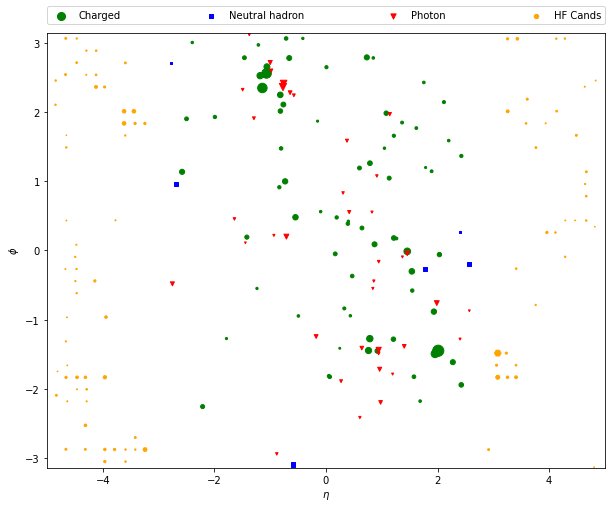

In [7]:
ievt = 4

fig=plt.figure(figsize=(10,8))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(pfcands['PF_eta'][ispfChg][ievt],  pfcands['PF_phi'][ispfChg][ievt],  s=pfcands['PF_pt'][ispfChg][ievt]*20.0,   c='green', label='Charged')
ax.scatter(pfcands['PF_eta'][ispfNeuH][ievt], pfcands['PF_phi'][ispfNeuH][ievt], s=pfcands['PF_pt'][ispfNeuH][ievt]*20.0,  c='blue', marker='s', label='Neutral hadron')
ax.scatter(pfcands['PF_eta'][ispfPho][ievt],  pfcands['PF_phi'][ispfPho][ievt],  s=pfcands['PF_pt'][ispfPho][ievt]*20.0,   c='red',marker='v', label='Photon')
ax.scatter(pfcands['PF_eta'][ispfHF][ievt],   pfcands['PF_phi'][ispfHF][ievt],   s=pfcands['PF_pt'][ispfHF][ievt]*20.0,    c='orange',marker='H', label='HF Cands')
#ln_coll=matplotlib.collections.LineCollection(lines,linestyle='--',linewidth=0.05,colors=['grey',])
#ax.add_collection(ln_coll)
ax.set_ylabel(r'$\phi$')
#plt.xticks(np.arange(-np.pi, np.pi))
ax.set_ylim(-np.pi, np.pi)
ax.set_xlabel(r'$\eta$')
ax.set_xlim(-5.0, 5.0)
ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left', ncol=4, mode="expand", borderaxespad=0.)
#plt.yticks(np.arange(-3.0, 3.0))
plt.show()

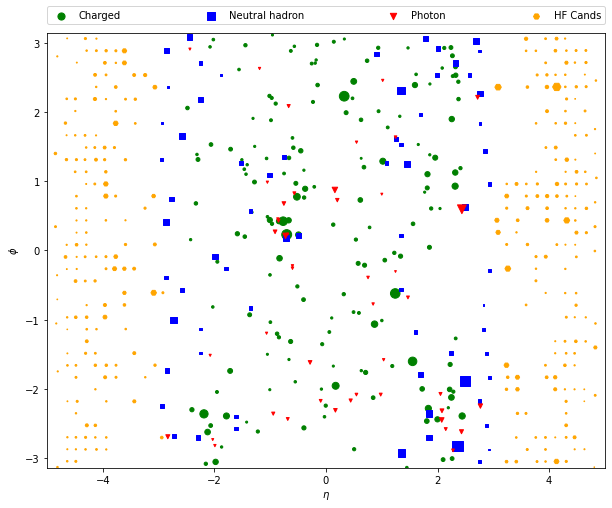

In [8]:
ievt = 4

fig=plt.figure(figsize=(10,8))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(pfcandsPU['PF_eta'][ispfChgPU][ievt],  pfcandsPU['PF_phi'][ispfChgPU][ievt],  s=pfcandsPU['PF_pt'][ispfChgPU][ievt]*20.0,   c='green', label='Charged')
ax.scatter(pfcandsPU['PF_eta'][ispfNeuHPU][ievt], pfcandsPU['PF_phi'][ispfNeuHPU][ievt], s=pfcandsPU['PF_pt'][ispfNeuHPU][ievt]*20.0,  c='blue', marker='s', label='Neutral hadron')
ax.scatter(pfcandsPU['PF_eta'][ispfPhoPU][ievt],  pfcandsPU['PF_phi'][ispfPhoPU][ievt],  s=pfcandsPU['PF_pt'][ispfPhoPU][ievt]*20.0,   c='red',marker='v', label='Photon')
ax.scatter(pfcandsPU['PF_eta'][ispfHFPU][ievt],   pfcandsPU['PF_phi'][ispfHFPU][ievt],   s=pfcandsPU['PF_pt'][ispfHFPU][ievt]*20.0,    c='orange',marker='H', label='HF Cands')
#ln_coll=matplotlib.collections.LineCollection(lines,linestyle='--',linewidth=0.05,colors=['grey',])
#ax.add_collection(ln_coll)
ax.set_ylabel(r'$\phi$')
#plt.xticks(np.arange(-np.pi, np.pi))
ax.set_ylim(-np.pi, np.pi)
ax.set_xlabel(r'$\eta$')
ax.set_xlim(-5.0, 5.0)
ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left', ncol=4, mode="expand", borderaxespad=0.)
#plt.yticks(np.arange(-3.0, 3.0))
plt.show()

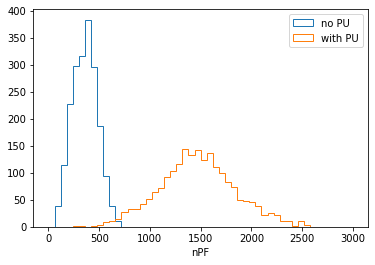

In [9]:
# plot the number of PF candidates per event
plt.figure()
plt.hist( ak.to_numpy(pfcands['nPF']), bins=50, range=(0,3000), histtype='step', label="no PU")
plt.hist( ak.to_numpy(pfcandsPU['nPF']), bins=50, range=(0,3000), histtype='step', label= "with PU")
plt.xlabel("nPF")
plt.legend()

plt.show()



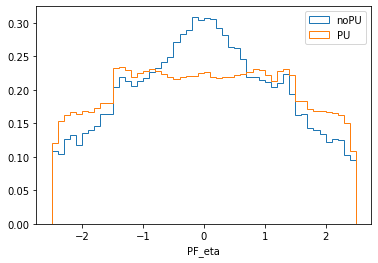

In [10]:
# plot the eta of PF candidates per event
plt.figure()
# ak.flatten/ak.ravel remove missing values (None) as well as squashing lists,
plt.hist( ak.to_numpy(ak.ravel(pfcands['PF_eta'])), bins=50, range=(-2.5,2.5), histtype='step',label='noPU',density=True)
plt.hist( ak.to_numpy(ak.ravel(pfcandsPU['PF_eta'])), bins=50, range=(-2.5,2.5), histtype='step',label='PU',density=True)
plt.xlabel("PF_eta")
plt.legend()
plt.show()

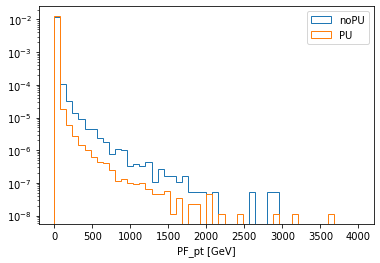

<Figure size 432x288 with 0 Axes>

In [11]:
#plot the Pt of charged PF Candiates
plt.figure()
plt.yscale("log")
plt.hist(ak.flatten(pfcands['PF_pt'][ispfChg][:]),bins=50, range=(0,4000), histtype='step', label='noPU', density=True)
plt.hist(ak.flatten(pfcandsPU['PF_pt'][ispfChgPU][:]),bins=50, range=(0,4000), histtype='step', label='PU', density=True)
plt.xlabel("PF_pt [GeV]")
plt.legend()
plt.show()
plt.savefig("ChqrgedPFCandidatesPT.png")

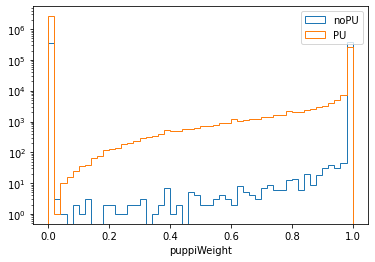

In [12]:
plt.figure()
plt.yscale("log")
plt.hist(ak.flatten(pfcands['PF_puppiWeight']),bins=50, range=(0,1), histtype='step', label='noPU')
plt.hist(ak.flatten(pfcandsPU['PF_puppiWeight']),bins=50, range=(0,1), histtype='step', label='PU', )
plt.xlabel("puppiWeight")
plt.legend()
plt.show()

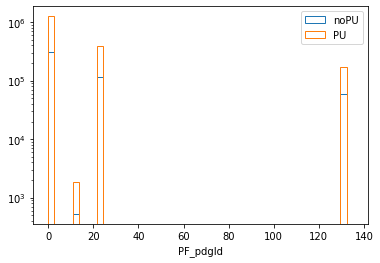

In [13]:
plt.figure()
plt.yscale("log")
plt.hist(ak.flatten(pfcands['PF_pdgId']),bins=50, range=(0,135), histtype='step', label='noPU')
plt.hist(ak.flatten(pfcandsPU['PF_pdgId']),bins=50, range=(0,135), histtype='step', label='PU', )
plt.xlabel("PF_pdgId")
plt.legend()
plt.show()

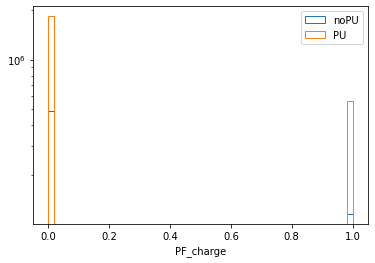

In [14]:
plt.figure()
plt.yscale("log")

plt.hist(ak.flatten(pfcands['PF_charge']),bins=50, range=(0,1), histtype='step', label='noPU')
plt.hist(ak.flatten(pfcandsPU['PF_charge']),bins=50, range=(0,1), histtype='step', label='PU', )
plt.xlabel("PF_charge")
plt.legend()
plt.show()

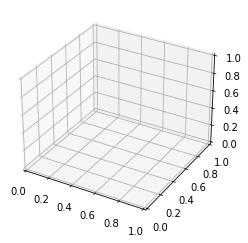

In [15]:
fig = plt.figure()
ax = plt.axes(projection='3d')

Text(0.5, 0, 'pt')

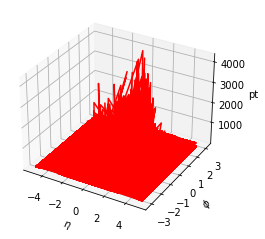

In [16]:
fig = plt.figure()
ax = plt.axes(projection='3d')
# Data for a three-dimensional line pt,eta, phi , PF candidates charged
pt= ak.to_numpy(ak.flatten(pfcands['PF_pt']))
eta=ak.to_numpy(ak.flatten(pfcands['PF_eta']))
phi=ak.to_numpy(ak.flatten(pfcands['PF_phi']))
ax.plot3D( eta, phi, pt, 'red')
ax.set_xlabel(r'$\eta$')
ax.set_ylabel(r'$\phi$')
ax.set_zlabel(r'pt')

Text(0.5, 0, 'pt')

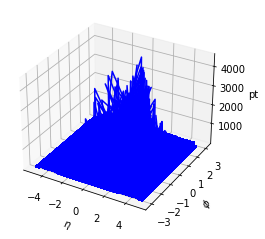

In [17]:
fig = plt.figure()
ax = plt.axes(projection='3d')
# Data for a three-dimensional line pt,eta, phi , PF candidates charged
ptPU= ak.to_numpy(ak.flatten(pfcandsPU['PF_pt']))
etaPU=ak.to_numpy(ak.flatten(pfcandsPU['PF_eta']))
phiPU=ak.to_numpy(ak.flatten(pfcandsPU['PF_phi']))
ax.plot3D( etaPU, phiPU, ptPU, 'blue')
ax.set_xlabel(r'$\eta$')
ax.set_ylabel(r'$\phi$')
ax.set_zlabel(r'pt')

In [18]:
wasserstein_distance([0, 1, 3], [5, 6, 8])

5.0

In [19]:
wasserstein_distance(pt,eta)

6.434013381123764

In [20]:
pt_PU= ak.to_numpy(ak.ravel(pfcandsPU['PF_pt']))
wasserstein_distance(pt,pt_PU)

3.960431760907702

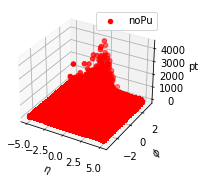

In [21]:
#Plot the distrubutions
fig = plt.figure()
#ax1 = fig.add_subplot(121)
#ax1.plot(eta, phi, '+b', label='noPu')
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(eta, phi, pt, color='r', label='noPu')
ax2.set_xlabel(r'$\eta$')
ax2.set_ylabel(r'$\phi$')
ax2.set_zlabel(r'pt')
plt.legend()
plt.show()


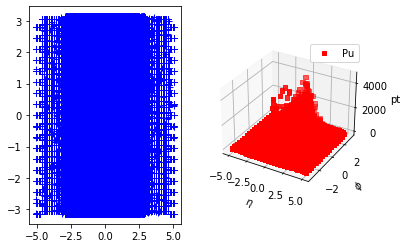

In [22]:
#Plot the distrubutions
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.plot(etaPU, phiPU, '+b', label='PU')
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(etaPU, phiPU, ptPU, color='r', marker='s', label='Pu')
ax2.set_xlabel(r'$\eta$')
ax2.set_ylabel(r'$\phi$')
ax2.set_zlabel(r'pt')
plt.legend()
plt.show()

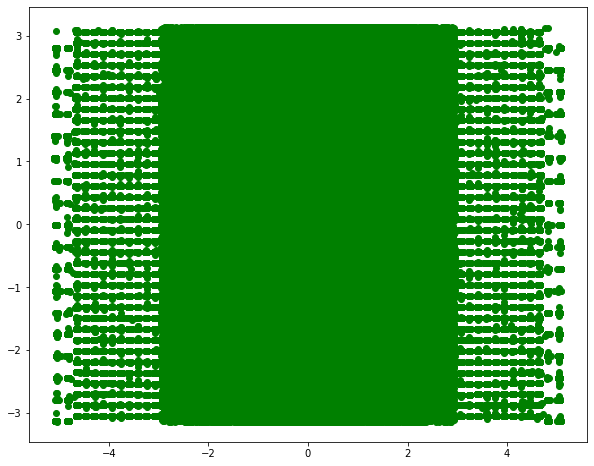

In [23]:
fig=plt.figure(figsize=(10,8))
ax = fig.add_subplot(1, 1, 1)
eta4=ak.to_numpy(ak.flatten(pfcands['PF_eta']))
phi4=ak.to_numpy(ak.flatten(pfcands['PF_phi']))
ax.scatter(eta4,  phi4,    c='green', label='noPU')

plt.show()



 

In [24]:

#eta=ak.to_numpy(ak.flatten(pfcands['PF_eta'][:,5:6]))
eta=ak.to_numpy(pfcands['PF_eta'][0,:])
#print(eta)
Pfcand= ak.to_numpy(pfcands['PF_eta'][0,:])
print(Pfcand)
#dist_phi = distance.cdist(eta, eta, 'cityblock')
#print(dist_phi)

[ 2.1323242e+00  7.0739746e-01 -6.2072754e-01  2.3979492e+00
  2.1464844e+00  1.9250488e+00  1.7546387e+00  1.6635742e+00
  1.5451660e+00  1.5368652e+00  1.2988281e+00  1.2382812e+00
  1.1950684e+00  1.1462402e+00  1.1132812e+00  9.8791504e-01
  7.7990723e-01  7.5280762e-01  6.5917969e-01  4.4824219e-01
  1.9226074e-01 -5.1269531e-02 -1.1480713e-01 -1.8988037e-01
 -8.5498047e-01 -9.0771484e-01 -9.9206543e-01 -1.2346191e+00
 -1.3759766e+00 -1.7719727e+00 -2.0371094e+00 -2.1435547e+00
 -2.2758789e+00 -2.3979492e+00  2.4423828e+00  2.4326172e+00
  2.0825195e+00  2.0751953e+00  1.8491211e+00  1.2128906e+00
  3.7353516e-01  3.5449219e-01  2.8253174e-01  2.5579834e-01
 -7.3242188e-04 -5.2807617e-01 -6.9091797e-01 -9.7399902e-01
 -1.1013184e+00 -1.6479492e+00 -2.3652344e+00 -2.3955078e+00
 -2.4482422e+00  2.2050781e+00  1.8820801e+00  1.6796875e+00
  1.6499023e+00  1.4282227e+00  1.3164062e+00  1.2468262e+00
  9.4433594e-01  5.9509277e-01  5.0488281e-01  3.7243652e-01
  2.6934814e-01  1.94458

In [25]:
PfcandChg= pfcandsPU['PF_charge'][ispfChgPU][:]